In [16]:
import numpy as np
import matplotlib.pyplot as plt


def kmeans(data, cluster_num, method='mean'):
    points = np.array(data)
    labels = []
    random_idx = []
    while True:
        t = np.random.randint(points.shape[0])
        if t not in random_idx:
            random_idx.append(t)
        if len(random_idx) == cluster_num:
            break

    seeds = []
    for i in range(cluster_num):
        seeds.append(points[random_idx[i]])
    seeds = np.array(seeds)
    prev_seeds = seeds + 10
    colors = ["red", "blue", "yellow", "cyan", "purple"]
    points_labeled = []
    for i in range(cluster_num):
        points_labeled.append([])

    while sum(abs((prev_seeds - seeds).ravel())) > 0:
        prev_seeds = seeds.copy()
        for i in range(points.shape[0]):
            t_min = 10000
            for j in range(seeds.shape[0]):
                t_current = np.sqrt((points[i][0] - seeds[j][0]) ** 2 + (points[i][1] - seeds[j][1]) ** 2)
                if t_current < t_min:
                    t_min = t_current
                    try:
                        labels.pop(i)
                    except IndexError:
                        pass
                    labels.append(j)
        for i in range(len(labels)):
            points_labeled[labels[i]].append(points[i].tolist())
        points_labeled = np.array(points_labeled)
        for i in range(points_labeled.shape[0]):
            if points_labeled[i]:
                plt.scatter(np.array(points_labeled[i])[:, 1], np.array(points_labeled[i])[:, 0], c=colors[i])
        for i in seeds:
            plt.scatter(i[1], i[0], c="black", linewidths=3)
        plt.show()
        for i in range(seeds.shape[0]):
            if method == 'mean':
                seeds[i] = np.array(
                    [np.mean(np.array(points_labeled[i])[:, 0]), np.mean(np.array(points_labeled[i])[:, 1])])
            elif method == 'median':
                seeds[i] = np.array(
                    [np.median(np.array(points_labeled[i])[:, 0]), np.median(np.array(points_labeled[i])[:, 1])])
        points_labeled = []
        for i in range(cluster_num):
            points_labeled.append([])
        labels = []

    return seeds, labels, sum(abs((prev_seeds - seeds).ravel()))

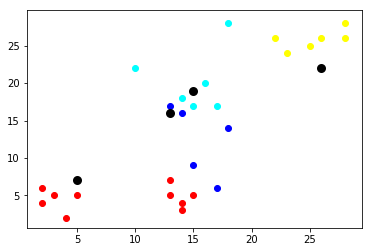

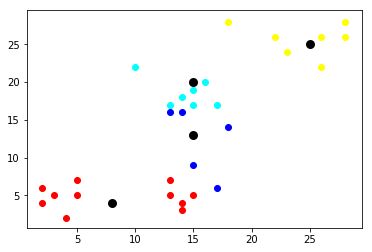

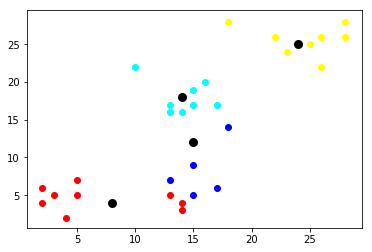

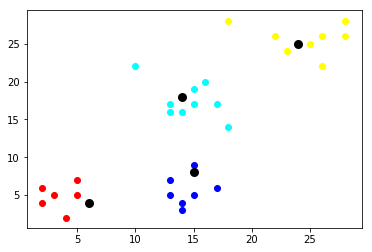

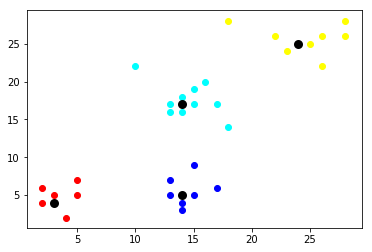

In [17]:
points = [
    [2, 4], [4, 2], [6, 2], [5, 3], [5, 5], [7, 5],
    [5, 15], [6, 17], [4, 14], [5, 13], [9, 15], [3, 14], [7, 13],
    [20, 16], [19, 15], [17, 15], [16, 14], [14, 18], [22, 10], [17, 17], [16, 13], [18, 14], [17, 13],
    [22, 26], [24, 23], [25, 25], [26, 22], [26, 26], [26, 28], [28, 18], [28, 28]
]
cluster_num = 4
[centroids, labels, interia] = kmeans(points, cluster_num)